SIMPLE LINEAR REGRESSION - SINGLE FEATURE
True coefficient: 2.5, Estimated coefficient: 2.4489
True intercept: 1.8, Estimated intercept: 2.0662
Mean squared error: 0.8066
R score: 0.9814

MULTIPLE LINEAR REGRESSION - MULTIPLE FEATURES
True coefficients: [ 2.5  1.2 -0.8], Estimated coefficients: [ 2.52476122  1.16713974 -0.78998332]
True intercept: 1.8, Estimated intercept: 1.7640
Mean squared error: 1.4331
R score: 0.9784


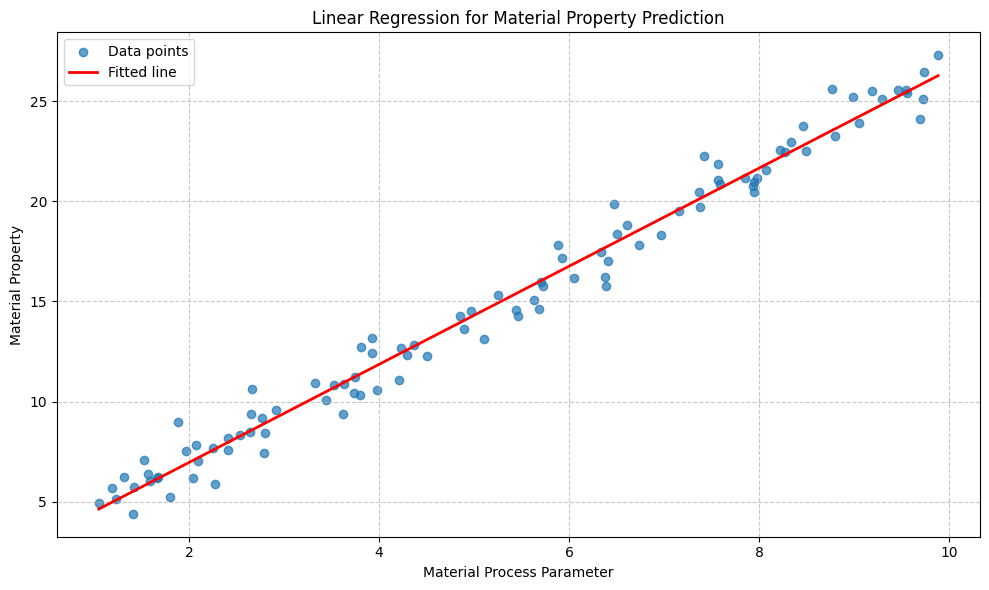

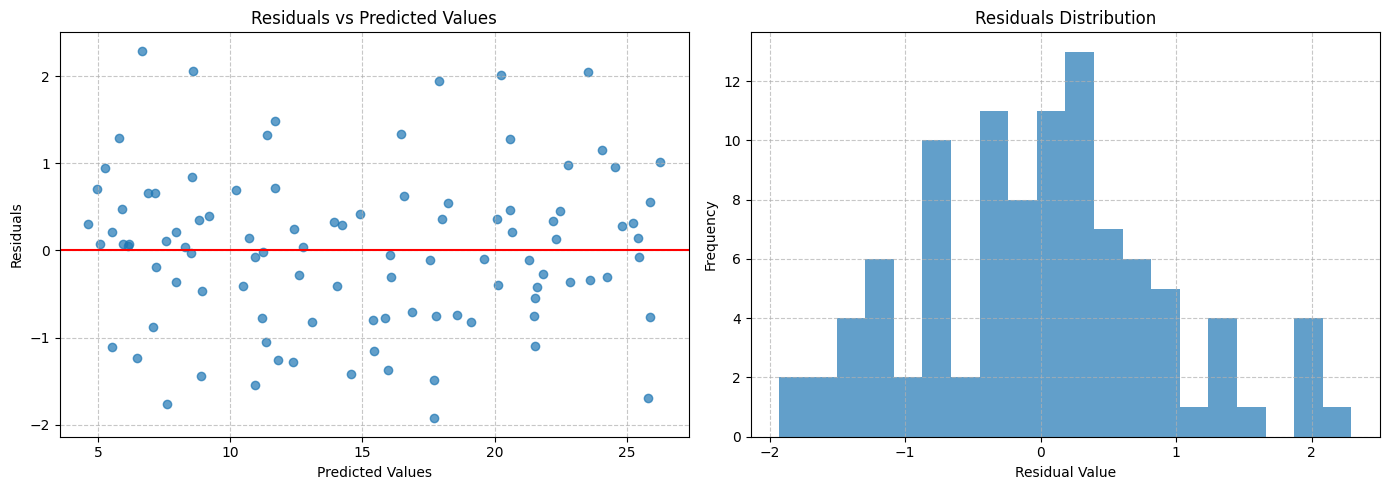

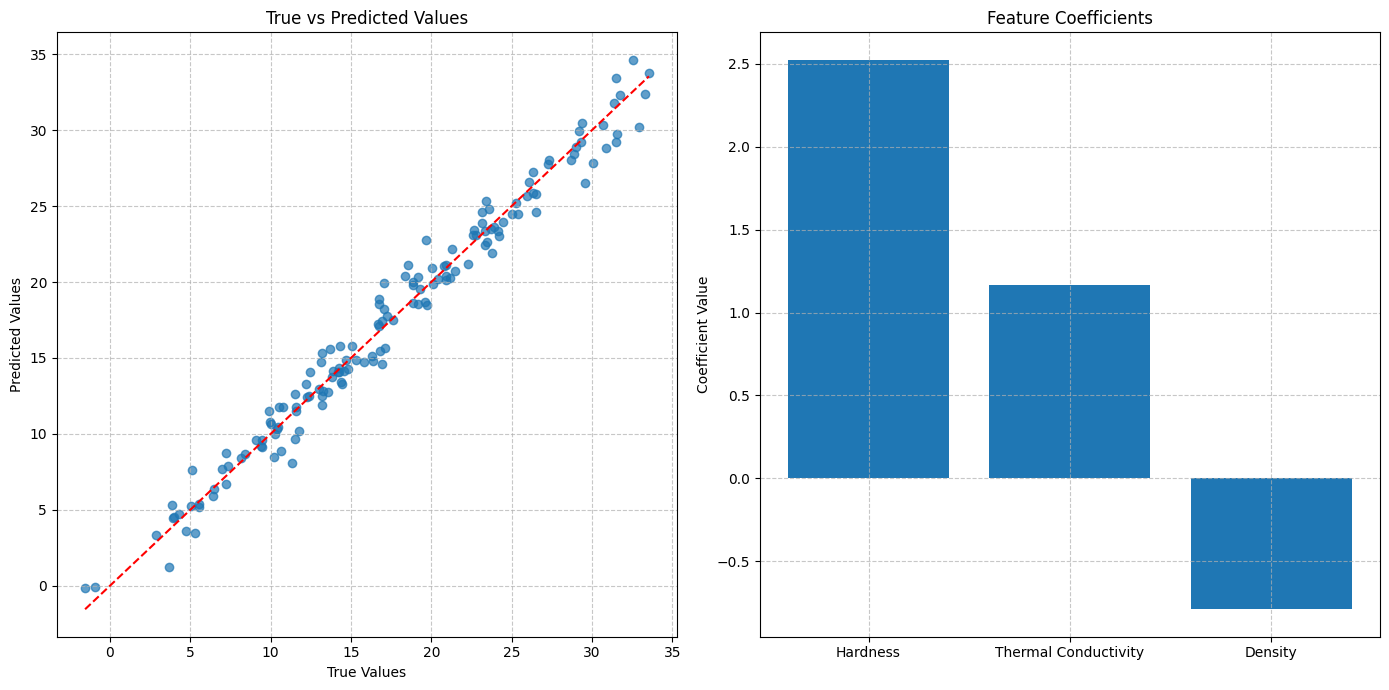

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_material_data(n_samples=200, noise=0.5):
    X = np.random.uniform(1, 10, (n_samples, 1))
    true_coef = 2.5
    true_intercept = 1.8
    y = true_coef * X.flatten() + true_intercept + np.random.normal(0, noise, n_samples)
    return X, y, true_coef, true_intercept

def linear_regression(X, y):
    X_with_ones = np.column_stack((np.ones(X.shape[0]), X))
    coeffs = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y
    return coeffs[0], coeffs[1:]

def predict(X, intercept, coef):
    X_with_ones = np.column_stack((np.ones(X.shape[0]), X))
    return X_with_ones @ np.concatenate(([intercept], coef))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def linear_regression_multiple(X, y):
    X_with_ones = np.column_stack((np.ones(X.shape[0]), X))
    coeffs = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y
    return coeffs[0], coeffs[1:]

def generate_material_data_multiple(n_samples=200, noise=0.5):
    X = np.random.uniform(1, 10, (n_samples, 3))
    true_coefs = np.array([2.5, 1.2, -0.8])
    true_intercept = 1.8
    y = X @ true_coefs + true_intercept + np.random.normal(0, noise, n_samples)
    return X, y, true_coefs, true_intercept

def plot_regression_results(X, y, intercept, coef, title="Linear Regression for Material Property"):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.7, label='Data points')
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = intercept + X_range.flatten() * coef
    plt.plot(X_range, y_pred, color='red', linewidth=2, label='Fitted line')
    plt.xlabel('Material Process Parameter')
    plt.ylabel('Material Property')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    return plt

def analyze_residuals(X, y, y_pred):
    residuals = y - y_pred
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=20, alpha=0.7)
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title('Residuals Distribution')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    return plt

if __name__ == "__main__":
    np.random.seed(42)

    print("SIMPLE LINEAR REGRESSION - SINGLE FEATURE")
    X, y, true_coef, true_intercept = generate_material_data(n_samples=100, noise=1.0)

    intercept, coef = linear_regression(X, y)
    y_pred = predict(X, intercept, coef)

    print(f"True coefficient: {true_coef}, Estimated coefficient: {coef[0]:.4f}")
    print(f"True intercept: {true_intercept}, Estimated intercept: {intercept:.4f}")

    mse_value = mse(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean squared error: {mse_value:.4f}")
    print(f"R score: {r2:.4f}")

    plot_obj = plot_regression_results(X, y, intercept, coef[0], "Linear Regression for Material Property Prediction")
    residual_plot = analyze_residuals(X, y, y_pred)

    print("\nMULTIPLE LINEAR REGRESSION - MULTIPLE FEATURES")
    X_multi, y_multi, true_coefs, true_intercept = generate_material_data_multiple(n_samples=150, noise=1.2)

    intercept_multi, coefs_multi = linear_regression_multiple(X_multi, y_multi)
    y_pred_multi = predict(X_multi, intercept_multi, coefs_multi)

    print(f"True coefficients: {true_coefs}, Estimated coefficients: {coefs_multi.flatten()}")
    print(f"True intercept: {true_intercept}, Estimated intercept: {intercept_multi:.4f}")

    mse_multi = mse(y_multi, y_pred_multi)
    r2_multi = r2_score(y_multi, y_pred_multi)
    print(f"Mean squared error: {mse_multi:.4f}")
    print(f"R score: {r2_multi:.4f}")

    plt.figure(figsize=(14, 7))
    feature_names = ['Hardness', 'Thermal Conductivity', 'Density']
    true_vs_predicted = plt.subplot(1, 2, 1)
    true_vs_predicted.scatter(y_multi, y_pred_multi, alpha=0.7)
    true_vs_predicted.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--')
    true_vs_predicted.set_xlabel('True Values')
    true_vs_predicted.set_ylabel('Predicted Values')
    true_vs_predicted.set_title('True vs Predicted Values')
    true_vs_predicted.grid(True, linestyle='--', alpha=0.7)

    coef_plot = plt.subplot(1, 2, 2)
    coef_plot.bar(feature_names, coefs_multi.flatten())
    coef_plot.set_ylabel('Coefficient Value')
    coef_plot.set_title('Feature Coefficients')
    coef_plot.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

